In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [3]:
Load_Train = pd.read_csv('heatingOilTrainingset.csv')

In [4]:
Load_Train.head(10)

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2
5,5,76,129,3,21.5,3
6,5,72,131,4,23.5,3
7,6,88,161,2,38.2,6
8,5,77,184,3,42.5,3
9,10,42,225,3,51.1,1


In [5]:
Load_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


# Data Preparation

In [7]:
df_train = pd.DataFrame(Load_Train)

In [9]:
age = df_train['Avg_Age'].astype('int')

In [10]:
df_train

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2
...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5
1214,5,78,129,1,22.5,1
1215,5,77,138,3,26.8,1
1216,3,89,156,2,34.0,2


In [19]:
df_train['Age'] = df_train['Avg_Age'].astype('int')

In [20]:
df_train

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size,Age
0,6,74,132,4,23.8,4,23
1,10,43,263,4,56.7,4,56
2,3,81,145,2,28.0,6,28
3,9,50,196,4,45.1,3,45
4,2,80,131,5,20.8,2,20
...,...,...,...,...,...,...,...
1213,7,56,264,5,58.2,5,58
1214,5,78,129,1,22.5,1,22
1215,5,77,138,3,26.8,1,26
1216,3,89,156,2,34.0,2,34


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:title={'center':'Pearson Correlation'}>

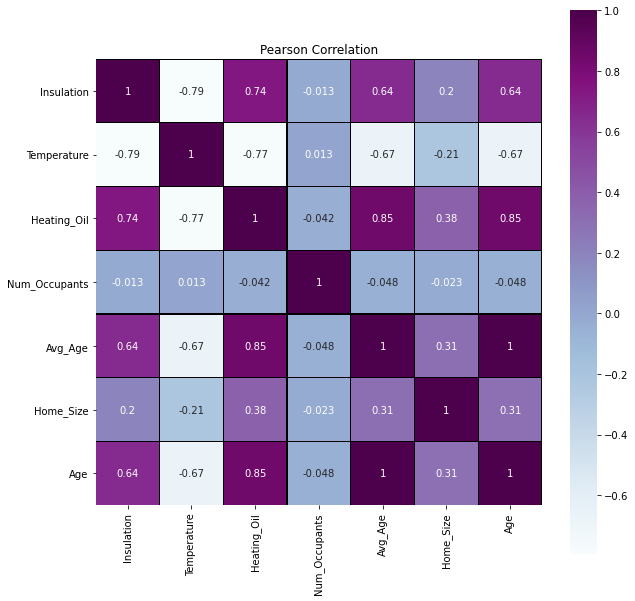

In [14]:
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Pearson Correlation')


#Mulai membuat 
sns.heatmap(df_train.astype(float).corr(), linewidths=0.25, vmax=1.0,square=True, cmap="BuPu", linecolor='black', annot=True)


# Data Modelling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [61]:
#X=df_train[['Temperature','Insulation','Num_Occupants','Age', 'Home_Size']]
X=df_train[['Temperature','Insulation','Age', 'Num_Occupants']]
# X=df_train[['Temperature','Insulation','Age']]

In [63]:
Y=df_train['Heating_Oil']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [65]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [66]:
print(regressor.coef_)

[-0.82868075  3.00973048  2.21777371 -0.39838817]


In [67]:
Y_pred = regressor.predict(X_test)

In [68]:
df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : Y_pred})

In [69]:
df

,Actual,Predicted
1144,135,136.403745
990,131,127.057605
478,118,126.819853
161,264,259.106624
1153,127,129.486975
...,...,...
996,187,187.848545
528,185,207.805511
825,181,178.939834
483,255,249.829112


In [70]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error :  15.716362178368335


# Machine Learning

In [71]:
load_data_testing = pd.read_csv('heatingOilTestingSet.csv')

In [72]:
df_data_testing = pd.DataFrame(load_data_testing)

In [73]:
df_data_testing['age'] = df_data_testing['Avg_Age'].astype(int)

In [75]:
df_test=df_data_testing[['Temperature','Insulation','age', 'Num_Occupants']]

In [77]:
test_prediction = regressor.predict(df_test)

In [79]:
heating_oil_predict = pd.DataFrame({'Heating_Oil_Prediction':test_prediction})

In [82]:
df_predict = pd.concat([df_data_testing, heating_oil_predict], ignore_index=False, sort=False, axis=1)

In [81]:
x=df_predict.to_excel('predicted_heasting_oil.xlsx', sheet_name='Sheet1')